# Exercício: Gerar Logótipos Sintéticos com DCGAN
* **Descrição:** Treina um DCGAN para criar protótipos de logótipos que ajudem equipas de marketing a testar identidades visuais sem designer humano.
* **Dataset:** Conjunto de imagens de logos
  * **Download:** https://www.kaggle.com/datasets/dimka11/lld-logo-files
  * AWS: https://genaiacademy.s3.eu-west-3.amazonaws.com/logo-files/logo-files.zip

## Passo a passo

1. Carregar logos 32×32 em escalas [-1,1]
2. Criar um modelo Gerador simples
3. Criar um modelo Discriminador
4. Ciclo treino simplificado
5. Mostrar o resultado

## Download do Dataset


*   Do Kaggle: https://www.kaggle.com/datasets/dimka11/lld-logo-files
*   Do AWS: https://genaiacademy.s3.eu-west-3.amazonaws.com/logo-files/logo-files.zip

In [1]:
!wget https://genaiacademy.s3.eu-west-3.amazonaws.com/logo-files/logo-files.zip
!unzip logo-files.zip

Streaming output truncated to the last 5000 lines.
  inflating: LLD-logo-files/webshots.png  
  inflating: LLD-logo-files/websim.png  
  inflating: LLD-logo-files/website.png  
  inflating: LLD-logo-files/websiteacademy.png  
  inflating: LLD-logo-files/websitealive.png  
  inflating: LLD-logo-files/websitebabble.png  
  inflating: LLD-logo-files/websitebaker.png  
  inflating: LLD-logo-files/websitebox.png  
  inflating: LLD-logo-files/websitebroker.png  
  inflating: LLD-logo-files/websitebuilder.png  
  inflating: LLD-logo-files/websitebuilderexpert.png  
  inflating: LLD-logo-files/websitebuildertop10.png  
  inflating: LLD-logo-files/websiteclosers.png  
  inflating: LLD-logo-files/websiteinhindi.png  
  inflating: LLD-logo-files/websitemagazine.png  
  inflating: LLD-logo-files/websitemuscle.png  
  inflating: LLD-logo-files/websitenotworking.png  
  inflating: LLD-logo-files/websitepulse.png  
  inflating: LLD-logo-files/websitesdepot.png  
  inflating: LLD-logo-files/websiteset

In [2]:
#!pip install tensorflow matplotlib
import tensorflow as tf, matplotlib.pyplot as plt

In [3]:
# 1. carregar logos 32×32 em escalas [-1,1]
imgs = tf.data.Dataset.list_files('LLD-logo-files/*.png').map(
    lambda f: (tf.image.convert_image_dtype(tf.image.resize(
        tf.io.decode_png(tf.io.read_file(f)), (32,32)), tf.float32)*2)-1)
batch = imgs.shuffle(1000).batch(128)

In [4]:
# (Opcional) Ver quantas imagens foram carregadas
print(len(imgs))

122920


In [5]:
# 2. Gerador simples
def gerador():
    modelo = tf.keras.Sequential([
        tf.keras.layers.Dense(8*8*256, use_bias=False, input_shape=(100,)),
        tf.keras.layers.Reshape((8,8,256)),
        tf.keras.layers.Conv2DTranspose(128,4,2,'same',use_bias=False,activation='relu'),
        tf.keras.layers.Conv2DTranspose(3,4,2,'same',use_bias=False,activation='tanh')
    ])
    return modelo

In [6]:
# 3. Discriminador
def discriminador():
    m = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64,4,2,'same',input_shape=(32,32,3)),
        tf.keras.layers.LeakyReLU(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return m

In [7]:
gen, disc = gerador(), discriminador()
gan = tf.keras.Sequential([gen, disc])
disc.compile('adam','binary_crossentropy')
disc.trainable = False
gan.compile('adam','binary_crossentropy')

# 4. ciclo treino simplificado
for ep in range(30):
    for real in batch:
        z = tf.random.normal((real.shape[0],100))
        fake = gen(z)
        disc.trainable = True
        disc.train_on_batch(tf.concat([real,fake],0),
                            tf.concat([tf.ones(real.shape[0]),tf.zeros(real.shape[0])],0))
        disc.trainable = False
        gan.train_on_batch(z, tf.ones(real.shape[0]))
    print(f'Época {ep+1} concluída')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Época 1 concluída
Época 2 concluída
Época 3 concluída
Época 4 concluída
Época 5 concluída
Época 6 concluída
Época 7 concluída
Época 8 concluída
Época 9 concluída
Época 10 concluída
Época 11 concluída
Época 12 concluída
Época 13 concluída
Época 14 concluída
Época 15 concluída
Época 16 concluída
Época 17 concluída
Época 18 concluída
Época 19 concluída
Época 20 concluída
Época 21 concluída
Época 22 concluída
Época 23 concluída
Época 24 concluída
Época 25 concluída
Época 26 concluída
Época 27 concluída
Época 28 concluída
Época 29 concluída
Época 30 concluída


(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

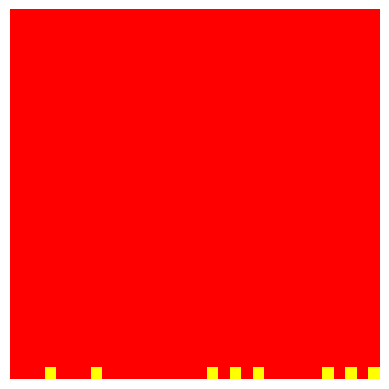

In [14]:
# 5. mostrar output
plt.imshow((gen(tf.random.normal((1,100)))[0]+1)/2); plt.axis('off')